In [90]:
import numpy as np
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import metrics
np.random.seed(13)
from sklearn import svm
import pandas as pd
import matplotlib.pyplot as plt
import math
from __future__ import division
from sklearn.model_selection import KFold
from sklearn.preprocessing import normalize
from stockstats import StockDataFrame 
from googlefinance.client import get_price_data, get_prices_data, get_prices_time_data
from adasyn import ADASYN
import dataPreparation
files=['AAPL','AMZN','GOOGL','MSFT','FB','INTC','CSCO','CMCSA','NVDA','NFLX','ADBE','AMGN','TXN','AVGO','PYPL','GILD','COST','QCOM']       
features=[  2 ,  5 ,  3  ,37,   6  , 7 ,  0  , 8 , 59  , 9,  10  ,11 , 12  ,13 ,  1  ,44,  42,  60,
  46 , 21 , 78,  45,  80,  82,  84,  86 , 88,  90 , 92,  23,  71,  41 ,110,  40 ,108,  39,
  62 ,106,  38 ,109]
prices=list()
for file in files:
    param = {
        'q': file, # Stock symbol (ex: "AAPL")
        'i': "900", # Interval size in seconds ("86400" = 1 day intervals)
        'x': "NASD", # INDEXNASDAQStock exchange symbol on which stock is traded (ex: "NASD")
        'p': "1Y" # Period (Ex: "1Y" = 1 year)
        }
    priceData = get_price_data(param)
    stock = StockDataFrame.retype(priceData)
    price = pd.DataFrame(stock)
    #string=['close_2_sma','close_4_sma','close_6_sma','close_8_sma','close_10_sma','close_12_sma','close_14_sma','close_16_sma','close_18_sma','pdi','mdi','dx','adx','adxr','cr','cr-ma1','cr-ma2','cr-ma3','boll','boll_ub','boll_lb','volume_-2_d','volume_-4_d','volume_-6_d','volume_-8_d','volume_-10_d','volume_-12_d','macd','macds','macdh','kdjk','kdjd','kdjj','tr','atr','wr_2','wr_10','wr_6','wr_8','wr_12','wr_14','close_-2_d','close_-4_d','close_-6_d','close_-8_d','close_-10_d','close_-12_d','close_-14_d','close_-16_d','rsi_2','rsi_4','rsi_6','rsi_8','rsi_10','rsi_12','rsi_14','rsi_16']
    string=['close_2_sma','close_4_sma','close_6_sma','close_8_sma','close_10_sma','close_12_sma','close_14_sma','close_16_sma','close_18_sma','pdi','mdi','dx','adx','adxr','cr','cr-ma1','cr-ma2','cr-ma3','boll','boll_ub','boll_lb','volume_-2_d','volume_-4_d','volume_-6_d','volume_-8_d','volume_-10_d','volume_-12_d','macd','macds','macdh','kdjk','kdjd','kdjj','tr','atr','wr_2','wr_10','wr_6','wr_8','wr_12','wr_14','close_-2_d','close_-4_d','close_-6_d','close_-8_d','close_-10_d','close_-12_d','close_-14_d','close_-16_d','rsi_2','rsi_4','rsi_6','rsi_8','rsi_10','rsi_12','rsi_14','rsi_16']
    stock.get(string)
    price = stock
    print(price.iloc[:,features])
    
    #['macd','macds', 'boll_ub', 'boll_lb','rsi_6','rsi_12','vr_6_sma','wr_10','wr_6''close_10_sma''tr''middle_{}_sma'
    #df['dma'] = df['close_10_sma'] - df['close_50_sma'] pdi'] = cls._get_pdi(df, 14)df['mdi'] = cls._get_mdi(df, 14)
    #df['dx'] = cls._get_dx(df, 14) df['adx'] = df['dx_6_ema'] df['adxr'] = df['adx_6_ema']]
    #

    prices.append(price.iloc[:,features])

/home/andrea/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


                          low  close_2_sma     close      middle  close_4_sma  \
2017-07-18 22:00:00  148.8200    148.85000  148.8500  148.983333   148.850000   
2017-07-18 22:15:00  148.6700    148.94500  149.0400  148.940000   148.945000   
2017-07-18 22:30:00  149.0000    149.14000  149.2400  149.166667   149.043333   
2017-07-18 22:45:00  148.7300    149.00000  148.7600  148.943333   148.972500   
2017-07-18 23:00:00  148.7000    148.99500  149.2300  149.076433   149.067500   
2017-07-18 23:15:00  149.0200    149.13000  149.0300  149.110000   149.065000   
2017-07-18 23:30:00  149.0100    149.09000  149.1500  149.123333   149.042500   
2017-07-18 23:45:00  149.1600    149.23250  149.3150  149.315000   149.181250   
2017-07-19 00:00:00  149.2224    149.29750  149.2800  149.284133   149.193750   
2017-07-19 00:15:00  149.1000    149.19000  149.1000  149.168333   149.211250   
2017-07-19 00:30:00  149.1000    149.16000  149.2200  149.190000   149.228750   
2017-07-19 00:45:00  149.200

                           low  close_2_sma      close       middle  \
2017-07-18 22:00:00  1009.3100   1012.31500  1012.3150  1011.761667   
2017-07-18 22:15:00  1010.5500   1012.58250  1012.8500  1012.696667   
2017-07-18 22:30:00  1012.6200   1013.85000  1014.8500  1014.146667   
2017-07-18 22:45:00  1011.4400   1013.28000  1011.7100  1012.880000   
2017-07-18 23:00:00  1011.5200   1013.60000  1015.4900  1014.230000   
2017-07-18 23:15:00  1014.9500   1015.73500  1015.9800  1015.976667   
2017-07-18 23:30:00  1015.7300   1016.47750  1016.9750  1016.738333   
2017-07-18 23:45:00  1017.1900   1018.49250  1020.0100  1019.346667   
2017-07-19 00:00:00  1019.6101   1021.24500  1022.4800  1021.680033   
2017-07-19 00:15:00  1022.0800   1022.52595  1022.5719  1022.883967   
2017-07-19 00:30:00  1020.7600   1022.81885  1023.0658  1022.351900   
2017-07-19 00:45:00  1021.1600   1022.26290  1021.4600  1022.136633   
2017-07-19 01:00:00  1021.0000   1021.77500  1022.0900  1021.780000   
2017-0

                           low  close_2_sma      close       middle  \
2017-07-18 22:00:00   974.9000    979.18000   979.1800   978.346667   
2017-07-18 22:15:00   976.4200    978.62000   978.0600   978.276667   
2017-07-18 22:30:00   977.5100    978.37000   978.6800   978.446667   
2017-07-18 22:45:00   977.2200    977.97000   977.2600   978.076667   
2017-07-18 23:00:00   977.4200    979.35500   981.4500   980.170000   
2017-07-18 23:15:00   980.8500    981.81000   982.1700   981.920000   
2017-07-18 23:30:00   982.2700    982.60000   983.0300   982.876667   
2017-07-18 23:45:00   982.5700    983.66000   984.2900   983.816667   
2017-07-19 00:00:00   983.6601    984.38500   984.4800   984.363367   
2017-07-19 00:15:00   984.3100    984.71000   984.9400   985.063333   
2017-07-19 00:30:00   984.6500    985.20000   985.4600   985.516633   
2017-07-19 00:45:00   984.9000    985.48000   985.5000   985.586667   
2017-07-19 01:00:00   985.2900    985.83000   986.1600   986.103333   
2017-0

                        low  close_2_sma    close     middle  close_4_sma  \
2017-07-18 22:00:00  73.022     73.22000  73.2200  73.210667    73.220000   
2017-07-18 22:15:00  73.020     73.17000  73.1200  73.130000    73.170000   
2017-07-18 22:30:00  73.060     73.11500  73.1100  73.110000    73.150000   
2017-07-18 22:45:00  72.950     73.04000  72.9700  73.040000    73.105000   
2017-07-18 23:00:00  72.960     73.07500  73.1800  73.115000    73.095000   
2017-07-18 23:15:00  73.000     73.09500  73.0100  73.070000    73.067500   
2017-07-18 23:30:00  72.860     72.96250  72.9150  72.945000    73.018750   
2017-07-18 23:45:00  72.910     72.94975  72.9845  72.981500    73.022375   
2017-07-19 00:00:00  72.880     72.93980  72.8951  72.921700    72.951150   
2017-07-19 00:15:00  72.770     72.83255  72.7700  72.820000    72.891150   
2017-07-19 00:30:00  72.680     72.72500  72.6800  72.710000    72.832400   
2017-07-19 00:45:00  72.660     72.72760  72.7752  72.745067    72.780075   

                          low  close_2_sma     close      middle  close_4_sma  \
2017-07-18 22:00:00  160.1600    160.78000  160.7800  160.616667   160.780000   
2017-07-18 22:15:00  160.0500    160.79500  160.8100  160.596667   160.795000   
2017-07-18 22:30:00  160.8200    160.99000  161.1700  161.090000   160.920000   
2017-07-18 22:45:00  160.7500    160.97750  160.7850  160.905000   160.886250   
2017-07-18 23:00:00  160.7490    161.04250  161.3000  161.149667   161.016250   
2017-07-18 23:15:00  161.0700    161.30500  161.3100  161.293333   161.141250   
2017-07-18 23:30:00  161.2800    161.42305  161.5361  161.488700   161.232775   
2017-07-18 23:45:00  161.3482    161.55805  161.5800  161.536067   161.431525   
2017-07-19 00:00:00  161.5300    161.73500  161.8900  161.783333   161.579025   
2017-07-19 00:15:00  161.6300    161.77000  161.6500  161.770000   161.664025   
2017-07-19 00:30:00  161.5800    161.62500  161.6000  161.646667   161.680000   
2017-07-19 00:45:00  161.390

                         low  close_2_sma    close     middle  close_4_sma  \
2017-07-18 22:00:00  34.3500     34.46000  34.4600  34.430000    34.460000   
2017-07-18 22:15:00  34.4400     34.51500  34.5700  34.530000    34.515000   
2017-07-18 22:30:00  34.5000     34.54750  34.5250  34.531667    34.518333   
2017-07-18 22:45:00  34.4000     34.46250  34.4000  34.443333    34.488750   
2017-07-18 23:00:00  34.3800     34.43050  34.4610  34.440333    34.489000   
2017-07-18 23:15:00  34.4200     34.44635  34.4317  34.440567    34.454425   
2017-07-18 23:30:00  34.4300     34.46085  34.4900  34.480000    34.445675   
2017-07-18 23:45:00  34.4900     34.49250  34.4950  34.501667    34.469425   
2017-07-19 00:00:00  34.4700     34.49000  34.4850  34.501667    34.475425   
2017-07-19 00:15:00  34.4400     34.46750  34.4500  34.463333    34.480000   
2017-07-19 00:30:00  34.4550     34.46000  34.4700  34.473867    34.475000   
2017-07-19 00:45:00  34.4450     34.46000  34.4500  34.461667   

                         low  close_2_sma    close     middle  close_4_sma  \
2017-07-18 22:00:00  31.1700     31.33000  31.3300  31.281667    31.330000   
2017-07-18 22:15:00  31.2900     31.34750  31.3650  31.345000    31.347500   
2017-07-18 22:30:00  31.3100     31.34245  31.3199  31.336633    31.338300   
2017-07-18 22:45:00  31.2300     31.28495  31.2500  31.266667    31.316225   
2017-07-18 23:00:00  31.2400     31.30000  31.3500  31.320000    31.321225   
2017-07-18 23:15:00  31.2830     31.32450  31.2990  31.314000    31.304725   
2017-07-18 23:30:00  31.2800     31.29700  31.2950  31.305000    31.298500   
2017-07-18 23:45:00  31.2900     31.31245  31.3299  31.326633    31.318475   
2017-07-19 00:00:00  31.3200     31.32995  31.3300  31.343333    31.313475   
2017-07-19 00:15:00  31.3300     31.33855  31.3471  31.355700    31.325500   
2017-07-19 00:30:00  31.3100     31.33105  31.3150  31.335000    31.330500   
2017-07-19 00:45:00  31.3100     31.31500  31.3150  31.325000   

                         low  close_2_sma    close     middle  close_4_sma  \
2017-07-18 22:00:00  38.9250     39.00000  39.0000  38.978333    39.000000   
2017-07-18 22:15:00  38.9350     39.02500  39.0500  39.011667    39.025000   
2017-07-18 22:30:00  38.9800     39.09000  39.1300  39.080000    39.060000   
2017-07-18 22:45:00  39.0300     39.09000  39.0500  39.083333    39.057500   
2017-07-18 23:00:00  38.9400     39.09000  39.1300  39.066667    39.090000   
2017-07-18 23:15:00  39.1100     39.15000  39.1700  39.156667    39.120000   
2017-07-18 23:30:00  39.1500     39.19000  39.2100  39.200000    39.140000   
2017-07-18 23:45:00  39.1700     39.20500  39.2000  39.221667    39.177500   
2017-07-19 00:00:00  39.1350     39.17500  39.1500  39.161667    39.182500   
2017-07-19 00:15:00  39.1400     39.15500  39.1600  39.166667    39.180000   
2017-07-19 00:30:00  39.1600     39.16500  39.1700  39.176667    39.170000   
2017-07-19 00:45:00  39.1670     39.17000  39.1700  39.182333   

                          low  close_2_sma     close      middle  close_4_sma  \
2017-07-18 22:00:00  163.3100    164.47000  164.4700  164.220000   164.470000   
2017-07-18 22:15:00  163.9200    164.94000  165.4100  164.943333   164.940000   
2017-07-18 22:30:00  165.0600    165.47500  165.5400  165.500000   165.140000   
2017-07-18 22:45:00  164.5787    165.09000  164.6400  164.969567   165.015000   
2017-07-18 23:00:00  164.5300    165.16000  165.6800  165.396667   165.317500   
2017-07-18 23:15:00  165.1500    165.53500  165.3900  165.446667   165.312500   
2017-07-18 23:30:00  165.1900    165.77000  166.1500  165.930000   165.465000   
2017-07-18 23:45:00  165.6000    165.92500  165.7000  165.906667   165.730000   
2017-07-19 00:00:00  164.6800    165.36000  165.0200  165.149967   165.565000   
2017-07-19 00:15:00  164.8100    164.97500  164.9300  165.036667   165.450000   
2017-07-19 00:30:00  164.1700    164.65500  164.3800  164.516667   165.007500   
2017-07-19 00:45:00  164.210

                          low  close_2_sma     close      middle  close_4_sma  \
2017-07-18 22:00:00  175.2400    176.33000  176.3300  176.316667   176.330000   
2017-07-18 22:15:00  176.0808    177.28995  178.2499  177.543567   177.289950   
2017-07-18 22:30:00  177.7000    178.54495  178.8400  178.480000   177.806633   
2017-07-18 22:45:00  178.1000    178.82050  178.8010  178.683667   178.055225   
2017-07-18 23:00:00  178.6200    179.61050  180.4200  179.893333   179.077725   
2017-07-18 23:15:00  180.2100    180.89325  181.3665  181.022167   179.856875   
2017-07-18 23:30:00  180.8200    181.92325  182.4800  182.050600   180.766875   
2017-07-18 23:45:00  182.4500    182.82950  183.1790  183.106333   181.861375   
2017-07-19 00:00:00  182.8500    183.74975  184.3205  183.886833   182.836500   
2017-07-19 00:15:00  183.6500    184.07940  183.8383  184.146100   183.454450   
2017-07-19 00:30:00  182.6600    183.36165  182.8850  183.308333   183.555700   
2017-07-19 00:45:00  182.230

                          low  close_2_sma     close      middle  close_4_sma  \
2017-07-18 22:00:00  146.1490    146.22000  146.2200  146.314667   146.220000   
2017-07-18 22:15:00  146.0300    146.27500  146.3300  146.296667   146.275000   
2017-07-18 22:30:00  146.3000    146.47000  146.6100  146.538333   146.386667   
2017-07-18 22:45:00  146.3700    146.59000  146.5700  146.536667   146.432500   
2017-07-18 23:00:00  146.5570    146.79500  147.0200  146.869000   146.632500   
2017-07-18 23:15:00  146.6800    146.89000  146.7600  146.810000   146.740000   
2017-07-18 23:30:00  146.6800    146.81500  146.8700  146.847867   146.805000   
2017-07-18 23:45:00  146.6500    146.76000  146.6500  146.800000   146.825000   
2017-07-19 00:00:00  146.6000    146.76000  146.8700  146.800000   146.787500   
2017-07-19 00:15:00  146.8800    147.01000  147.1500  147.120000   146.885000   
2017-07-19 00:30:00  147.0900    147.17000  147.1900  147.200000   146.965000   
2017-07-19 00:45:00  147.120

                          low  close_2_sma     close      middle  close_4_sma  \
2017-07-18 22:00:00  176.3375    176.53000  176.5300  176.592500   176.530000   
2017-07-18 22:15:00  176.2500    176.67000  176.8100  176.683333   176.670000   
2017-07-18 22:30:00  176.7000    176.96250  177.1150  177.013333   176.818333   
2017-07-18 22:45:00  176.2600    176.72750  176.3400  176.593333   176.698750   
2017-07-18 23:00:00  176.2800    176.75500  177.1700  176.873333   176.858750   
2017-07-18 23:15:00  177.0000    177.26000  177.3500  177.233333   176.993750   
2017-07-18 23:30:00  176.7800    177.17500  177.0000  177.040000   176.965000   
2017-07-18 23:45:00  176.9400    177.13000  177.2600  177.176667   177.195000   
2017-07-19 00:00:00  177.0600    177.18190  177.1038  177.154600   177.178450   
2017-07-19 00:15:00  176.9400    177.06690  177.0300  177.120000   177.098450   
2017-07-19 00:30:00  177.0000    177.02550  177.0210  177.103667   177.103700   
2017-07-19 00:45:00  176.670

                          low  close_2_sma     close      middle  close_4_sma  \
2017-07-18 22:00:00   81.3500     81.45000   81.4500   81.426667    81.450000   
2017-07-18 22:15:00   81.3700     81.56750   81.6850   81.598333    81.567500   
2017-07-18 22:30:00   81.6400     81.71750   81.7500   81.720000    81.628333   
2017-07-18 22:45:00   81.4500     81.61500   81.4800   81.563333    81.591250   
2017-07-18 23:00:00   81.4600     81.64000   81.8000   81.690000    81.678750   
2017-07-18 23:15:00   81.6400     81.73000   81.6600   81.700000    81.672500   
2017-07-18 23:30:00   81.6200     81.70000   81.7400   81.721667    81.670000   
2017-07-18 23:45:00   81.7450     81.75500   81.7700   81.798333    81.742500   
2017-07-19 00:00:00   81.7200     81.76000   81.7500   81.785000    81.730000   
2017-07-19 00:15:00   81.6300     81.69000   81.6300   81.690000    81.722500   
2017-07-19 00:30:00   81.6200     81.66000   81.6900   81.676667    81.710000   
2017-07-19 00:45:00   81.650

                          low  close_2_sma     close      middle  close_4_sma  \
2017-07-18 22:00:00  247.1000    247.40000  247.4000  247.466667   247.400000   
2017-07-18 22:15:00  247.1200    247.39950  247.3990  247.406333   247.399500   
2017-07-18 22:30:00  247.3200    247.63450  247.8700  247.740000   247.556333   
2017-07-18 22:45:00  247.2576    247.58000  247.2900  247.505867   247.489750   
2017-07-18 23:00:00  247.2700    248.12250  248.9550  248.408333   247.878500   
2017-07-18 23:15:00  248.4300    248.81750  248.6800  248.706667   248.198750   
2017-07-18 23:30:00  248.6400    249.01500  249.3500  249.173333   248.568750   
2017-07-18 23:45:00  249.3700    249.51500  249.6800  249.640000   249.166250   
2017-07-19 00:00:00  249.6100    249.80500  249.9300  249.863333   249.410000   
2017-07-19 00:15:00  249.8900    250.03500  250.1400  250.133333   249.775000   
2017-07-19 00:30:00  249.9400    250.04000  249.9400  250.043333   249.922500   
2017-07-19 00:45:00  249.510

                         low  close_2_sma    close     middle  close_4_sma  \
2017-07-18 22:00:00  57.7100     57.78000  57.7800  57.800000    57.780000   
2017-07-18 22:15:00  57.7700     57.91500  58.0500  57.990000    57.915000   
2017-07-18 22:30:00  57.9600     58.03000  58.0100  58.006400    57.946667   
2017-07-18 22:45:00  57.8800     57.96145  57.9129  57.967633    57.938225   
2017-07-18 23:00:00  57.9040     58.06145  58.2100  58.111333    58.045725   
2017-07-18 23:15:00  57.9953     58.10265  57.9953  58.069100    58.032050   
2017-07-18 23:30:00  57.9600     57.97765  57.9600  58.006667    58.019550   
2017-07-18 23:45:00  57.9700     58.07500  58.1900  58.126667    58.088825   
2017-07-19 00:00:00  58.1500     58.27000  58.3500  58.283333    58.123825   
2017-07-19 00:15:00  58.2100     58.31500  58.2800  58.310000    58.195000   
2017-07-19 00:30:00  58.2400     58.36500  58.4500  58.380000    58.317500   
2017-07-19 00:45:00  58.2100     58.34000  58.2300  58.292033   

                         low  close_2_sma    close     middle  close_4_sma  \
2017-07-18 22:00:00  70.7200     71.02000  71.0200  70.926667    71.020000   
2017-07-18 22:15:00  70.8500     71.11500  71.2100  71.101667    71.115000   
2017-07-18 22:30:00  71.1600     71.25500  71.3000  71.256667    71.176667   
2017-07-18 22:45:00  70.9500     71.13000  70.9600  71.070000    71.122500   
2017-07-18 23:00:00  70.9300     71.06000  71.1600  71.083333    71.157500   
2017-07-18 23:15:00  71.1000     71.14500  71.1300  71.133333    71.137500   
2017-07-18 23:30:00  71.0900     71.12500  71.1200  71.126667    71.092500   
2017-07-18 23:45:00  71.0900     71.15735  71.1947  71.188233    71.151175   
2017-07-19 00:00:00  71.0700     71.17735  71.1600  71.156667    71.151175   
2017-07-19 00:15:00  71.0436     71.13000  71.1000  71.107867    71.143675   
2017-07-19 00:30:00  71.1000     71.11750  71.1350  71.158800    71.147425   
2017-07-19 00:45:00  71.0200     71.07750  71.0200  71.073333   

                          low  close_2_sma     close      middle  close_4_sma  \
2017-07-18 22:00:00  151.9200    152.31000  152.3100  152.200000   152.310000   
2017-07-18 22:15:00  152.2200    152.32500  152.3400  152.336667   152.325000   
2017-07-18 22:30:00  152.2100    152.30000  152.2600  152.273333   152.303333   
2017-07-18 22:45:00  151.0000    151.86000  151.4600  151.580300   152.092500   
2017-07-18 23:00:00  151.4500    151.53500  151.6100  151.626667   151.917500   
2017-07-18 23:15:00  151.4200    151.56500  151.5200  151.526667   151.712500   
2017-07-18 23:30:00  151.3000    151.54000  151.5600  151.475000   151.537500   
2017-07-18 23:45:00  151.3800    151.52720  151.4944  151.502067   151.546100   
2017-07-19 00:00:00  151.2700    151.49720  151.5000  151.436667   151.518600   
2017-07-19 00:15:00  151.2800    151.42000  151.3400  151.375000   151.473600   
2017-07-19 00:30:00  151.3400    151.39500  151.4500  151.467933   151.446100   
2017-07-19 00:45:00  151.330

                         low  close_2_sma    close     middle  close_4_sma  \
2017-07-18 22:00:00  56.0738     56.14500  56.1450  56.146267    56.145000   
2017-07-18 22:15:00  56.0800     56.22250  56.3000  56.226667    56.222500   
2017-07-18 22:30:00  56.2100     56.25500  56.2100  56.240000    56.218333   
2017-07-18 22:45:00  56.0200     56.13000  56.0500  56.100000    56.176250   
2017-07-18 23:00:00  56.0300     56.12500  56.2000  56.143333    56.190000   
2017-07-18 23:15:00  56.0700     56.13500  56.0700  56.113333    56.132500   
2017-07-18 23:30:00  56.0400     56.06250  56.0550  56.068333    56.093750   
2017-07-18 23:45:00  56.0550     56.10750  56.1600  56.125000    56.121250   
2017-07-19 00:00:00  56.0800     56.14000  56.1200  56.123333    56.101250   
2017-07-19 00:15:00  56.0950     56.11750  56.1150  56.123333    56.112500   
2017-07-19 00:30:00  56.1200     56.12500  56.1350  56.146667    56.132500   
2017-07-19 00:45:00  56.0850     56.11250  56.0900  56.103533   

In [45]:
low             145.44
close_4_sma     145.50
close_2_sma     145.50
close           145.50
middle          145.52
close_6_sma     145.50
close_8_sma     145.50
close_12_ema    145.50
open            145.50
close_10_sma    145.50
close_12_sma    145.50
close_14_sma    145.50
close_16_sma    145.50
close_18_sma    145.50
close_20_sma    145.50
boll            145.50
high            145.62
close_26_ema    145.50
boll_lb            NaN
close_-1_s         NaN
close_-2_s         NaN
boll_ub            NaN
close_-4_s         NaN
close_-6_s         NaN
close_-8_s         NaN
close_-10_s        NaN
close_-12_s        NaN
close_-14_s        NaN
close_-16_s        NaN
atr_14             NaN
atr                NaN
cr-ma3             NaN
rsi_16             NaN
cr-ma2             NaN
rsi_14             NaN
cr-ma1             NaN
macds             0.00
rsi_12             NaN
cr                 NaN
macd              0.00
Name: 2017-07-13 21:30:00, dtype: float64

SyntaxError: invalid syntax (<ipython-input-45-62f9b91e9f1b>, line 1)

In [91]:
def smote(x,y):
    X_resampled, y_resampled = SMOTE().fit_sample(x, y)
    #print('check',sum(y_resampled)/len(y_resampled))
    return X_resampled,y_resampled


def balance(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    nindex=min(len(posindex[0]),len(negindex[0]))

    #for i in range(1,nindex):
    yt=np.concatenate((y[posindex[0][0:nindex]],y[negindex[0][0:nindex]]))
    xt=np.concatenate((x[posindex[0][0:nindex]],x[negindex[0][0:nindex]]))
    
    return xt,yt

def balanceup(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    
    if(len(posindex[0])!=0 and len(negindex[0])!=0):
       
        nindex=max(len(posindex[0]),len(negindex[0]))
        mini=min(len(posindex[0]),len(negindex[0]))
        diff=nindex-mini
        u=0
        for i in range(0,mini):
            yt.append(y[posindex[0][i]])
            yt.append(y[negindex[0][i]])
            xt.append(x[posindex[0][i]])
            xt.append(x[negindex[0][i]])
        #print('first',sum(yt)/len(yt)) 
        if(len(posindex[0])>len(negindex[0])):
            toextract=negindex
            enter=posindex
        else:
            toextract=posindex
            enter=negindex
        if(diff!=0 and len(toextract[0])!=0):
            for i in range(0,diff):
                r=np.random.randint(0,len(toextract))
                yt.append(y[toextract[0][r]])
                xt.append(x[toextract[0][r]])
                yt.append(y[enter[0][mini+i]])
                xt.append(x[enter[0][mini+i]])
    else:
        #print('Unbalance')
        u=1
        xt=x
        yt=y
    #print(sum(yt)/len(yt))              
    return xt,yt,u
                    

Working on... AAPL


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


372.7593720314938
Window: 1
[[204 356]
 [194 411]]
F1,score 0.5991253644314869
Accuracy: 0.5278969957081545
138.94954943731375
Window: 5
[[338 219]
 [339 268]]
F1,score 0.489945155393053
Accuracy: 0.520618556701031
11.787686347935873
Window: 25
[[356 144]
 [442 218]]
F1,score 0.42661448140900193
Accuracy: 0.49482758620689654
0.0001
Window: 40
[[  0 468]
 [  0 689]]
F1,score 0.7464788732394367
Accuracy: 0.5955056179775281
0.0001
Window: 80
[[  0 453]
 [  0 696]]
F1,score 0.7544715447154472
Accuracy: 0.6057441253263708
0.0001
Window: 115
[[  0 429]
 [  0 713]]
F1,score 0.768733153638814
Accuracy: 0.6243432574430823
0.0001
Window: 145
[[  0 435]
 [  0 701]]
F1,score 0.7632008709853021
Accuracy: 0.6170774647887324
0.0001
Window: 170
[[  0 422]
 [  0 709]]
F1,score 0.7706521739130434
Accuracy: 0.6268788682581786
0.3593813663804626
Window: 200
[[335  86]
 [216 488]]
F1,score 0.7636932707355243
Accuracy: 0.7315555555555555
1.0
Window: 250
[[358  67]
 [187 503]]
F1,score 0.7984126984126984
Acc

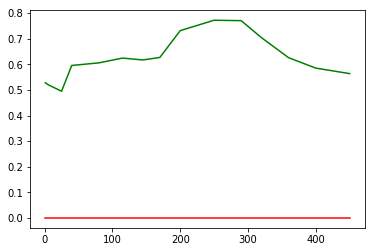

Working on... AMZN
4.39397056076079
Window: 1
[[ 14 563]
 [ 13 575]]
F1,score 0.6662804171494786
Accuracy: 0.5055793991416309
0.0001
Window: 5
[[  0 573]
 [  0 591]]
F1,score 0.6735042735042734
Accuracy: 0.5077319587628866
138.94954943731375
Window: 25
[[ 36 494]
 [  9 621]]
F1,score 0.7117478510028653
Accuracy: 0.5663793103448276
31.622776601683793
Window: 40
[[  1 532]
 [  0 624]]
F1,score 0.701123595505618
Accuracy: 0.54019014693172
31.622776601683793
Window: 80
[[ 16 449]
 [  0 684]]
F1,score 0.7528893780957623
Accuracy: 0.6092254134029591
10000.0
Window: 115
[[355  90]
 [299 398]]
F1,score 0.6717299578059073
Accuracy: 0.659369527145359
1291.5496650148827
Window: 145
[[288 134]
 [241 473]]
F1,score 0.716124148372445
Accuracy: 0.6698943661971831
1291.5496650148827
Window: 170
[[272 158]
 [245 456]]
F1,score 0.6935361216730037
Accuracy: 0.6436781609195402
1291.5496650148827
Window: 200
[[308 103]
 [202 512]]
F1,score 0.7705041384499622
Accuracy: 0.7288888888888889
372.7593720314938
W

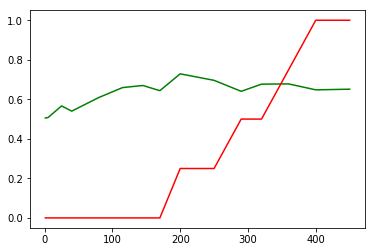

Working on... GOOGL
10000.0
Window: 1
[[115 447]
 [102 500]]
F1,score 0.6455777921239509
Accuracy: 0.5283505154639175
1.0
Window: 5
[[  0 582]
 [  0 582]]
F1,score 0.6666666666666666
Accuracy: 0.5
4.39397056076079
Window: 25
[[  0 528]
 [  5 627]]
F1,score 0.7017347509792947
Accuracy: 0.5405172413793103
10000.0
Window: 40
[[ 68 453]
 [ 63 573]]
F1,score 0.6895306859205776
Accuracy: 0.554019014693172
10000.0
Window: 80
[[134 374]
 [ 42 599]]
F1,score 0.7422552664188351
Accuracy: 0.6379460400348129
610.5402296585327
Window: 115
[[ 62 482]
 [ 18 580]]
F1,score 0.6987951807228916
Accuracy: 0.5621716287215411
10000.0
Window: 145
[[ 45 475]
 [  9 607]]
F1,score 0.7149587750294464
Accuracy: 0.573943661971831
1.637893706954064
Window: 170
[[  0 533]
 [  0 598]]
F1,score 0.6917293233082707
Accuracy: 0.5287356321839081
227.58459260747887
Window: 200
[[ 27 501]
 [  3 594]]
F1,score 0.7021276595744682
Accuracy: 0.552
138.94954943731375
Window: 250
[[ 61 460]
 [  0 594]]
F1,score 0.7208737864077671

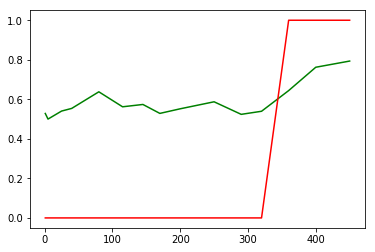

Working on... MSFT
1.0
Window: 1
[[  0 566]
 [  0 599]]
F1,score 0.6791383219954649
Accuracy: 0.5141630901287554
1.0
Window: 5
[[  0 542]
 [  0 622]]
F1,score 0.696528555431131
Accuracy: 0.5343642611683849
2.782559402207126
Window: 25
[[ 87 403]
 [ 35 635]]
F1,score 0.743559718969555
Accuracy: 0.6224137931034482
11.787686347935873
Window: 40
[[ 80 392]
 [ 13 672]]
F1,score 0.7684391080617496
Accuracy: 0.6499567847882455
84.83428982440716
Window: 80
[[316 125]
 [324 384]]
F1,score 0.6310599835661462
Accuracy: 0.6092254134029591
1.0
Window: 115
[[  0 366]
 [  0 776]]
F1,score 0.8091762252346195
Accuracy: 0.6795096322241682
1.0
Window: 145
[[  0 363]
 [  0 773]]
F1,score 0.8098480880041907
Accuracy: 0.6804577464788732
1.0
Window: 170
[[  0 403]
 [  0 728]]
F1,score 0.7832167832167831
Accuracy: 0.6436781609195402
1.0
Window: 200
[[  0 384]
 [  0 741]]
F1,score 0.7942122186495177
Accuracy: 0.6586666666666666
1.0
Window: 250
[[  0 326]
 [  0 789]]
F1,score 0.828781512605042
Accuracy: 0.70762

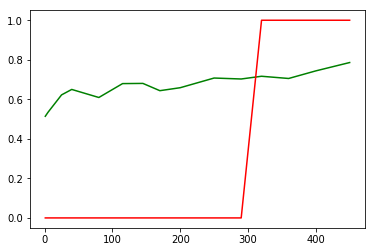

Working on... FB
4.39397056076079
Window: 1
[[  2 572]
 [  0 591]]
F1,score 0.6738882554161915
Accuracy: 0.5090128755364807
7.196856730011519
Window: 5
[[  9 572]
 [ 12 571]]
F1,score 0.6616454229432214
Accuracy: 0.49828178694158076
1291.5496650148827
Window: 25
[[285 247]
 [279 349]]
F1,score 0.5702614379084967
Accuracy: 0.5465517241379311
1000.0
Window: 40
[[260 246]
 [204 447]]
F1,score 0.6651785714285714
Accuracy: 0.6110630942091616
1000.0
Window: 80
[[166 188]
 [239 556]]
F1,score 0.7225471085120208
Accuracy: 0.6283724978241949
21.54434690031882
Window: 115
[[ 95 223]
 [149 675]]
F1,score 0.7839721254355402
Accuracy: 0.6742556917688266
1.637893706954064
Window: 145
[[ 91 228]
 [131 686]]
F1,score 0.7926054303870596
Accuracy: 0.6839788732394366
1.637893706954064
Window: 170
[[ 81 207]
 [117 726]]
F1,score 0.8175675675675677
Accuracy: 0.713527851458886
2.6826957952797255
Window: 200
[[ 76 203]
 [127 719]]
F1,score 0.8133484162895929
Accuracy: 0.7066666666666667
2.782559402207126
Win

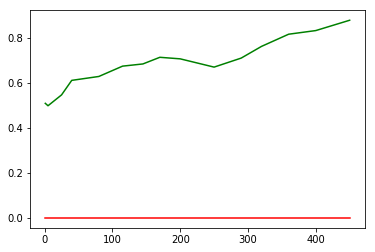

Working on... INTC
372.7593720314938
Window: 1
[[  2 552]
 [  6 605]]
F1,score 0.6843891402714932
Accuracy: 0.5210300429184549
1000.0
Window: 5
[[485  59]
 [537  83]]
F1,score 0.2178477690288714
Accuracy: 0.4879725085910653
51.7947467923121
Window: 25
[[439  18]
 [646  57]]
F1,score 0.14652956298200515
Accuracy: 0.42758620689655175
372.7593720314938
Window: 40
[[417  23]
 [640  77]]
F1,score 0.18849449204406366
Accuracy: 0.42696629213483145
84.83428982440716
Window: 80
[[412  38]
 [619  80]]
F1,score 0.19583843329253367
Accuracy: 0.4281984334203655
10000.0
Window: 115
[[266 162]
 [377 337]]
F1,score 0.5556471558120363
Accuracy: 0.5280210157618214
84.83428982440716
Window: 145
[[344  99]
 [478 215]]
F1,score 0.4270109235352533
Accuracy: 0.4920774647887324
19.306977288832496
Window: 170
[[372  60]
 [526 173]]
F1,score 0.37124463519313305
Accuracy: 0.4818744473916888
0.0001
Window: 200
[[  0 420]
 [  0 705]]
F1,score 0.7704918032786886
Accuracy: 0.6266666666666667
51.7947467923121
Window:

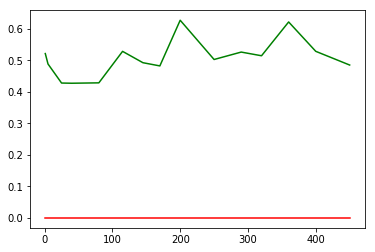

Working on... CSCO
166.81005372000558
Window: 1
[[143 425]
 [147 449]]
F1,score 0.6108843537414966
Accuracy: 0.5085910652920962
1.0
Window: 5
[[  0 558]
 [  0 606]]
F1,score 0.6847457627118645
Accuracy: 0.520618556701031
1.637893706954064
Window: 25
[[ 22 525]
 [ 43 570]]
F1,score 0.667447306791569
Accuracy: 0.5103448275862069
7.196856730011519
Window: 40
[[ 81 468]
 [ 32 576]]
F1,score 0.6973365617433414
Accuracy: 0.567847882454624
10000.0
Window: 80
[[356 189]
 [253 351]]
F1,score 0.6136363636363636
Accuracy: 0.6153176675369887
1.0
Window: 115
[[  0 522]
 [  0 620]]
F1,score 0.7037457434733257
Accuracy: 0.542907180385289
21.54434690031882
Window: 145
[[233 294]
 [ 54 555]]
F1,score 0.7613168724279835
Accuracy: 0.6936619718309859
1.637893706954064
Window: 170
[[  8 541]
 [  0 582]]
F1,score 0.6826979472140763
Accuracy: 0.5216622458001768
19.306977288832496
Window: 200
[[371 141]
 [151 462]]
F1,score 0.7598684210526315
Accuracy: 0.7404444444444445
21.54434690031882
Window: 250
[[357 14

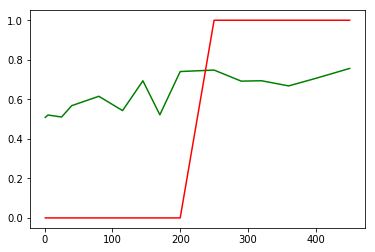

Working on... CMCSA
10000.0
Window: 1
[[546  26]
 [572  21]]
F1,score 0.06562500000000002
Accuracy: 0.48669527896995707
610.5402296585327
Window: 5
[[574   1]
 [588   1]]
F1,score 0.00338409475465313
Accuracy: 0.49398625429553267
138.94954943731375
Window: 25
[[533  38]
 [565  24]]
F1,score 0.07373271889400922
Accuracy: 0.48017241379310344
0.3593813663804626
Window: 40
[[131 455]
 [ 94 477]]
F1,score 0.6347305389221556
Accuracy: 0.5254969749351772
51.7947467923121
Window: 80
[[277 332]
 [286 254]]
F1,score 0.45115452930728245
Accuracy: 0.4621409921671018
1.637893706954064
Window: 115
[[ 89 499]
 [ 19 535]]
F1,score 0.6738035264483627
Accuracy: 0.5464098073555166
21.54434690031882
Window: 145
[[235 356]
 [226 319]]
F1,score 0.5229508196721312
Accuracy: 0.4876760563380282
0.3593813663804626
Window: 170
[[ 57 612]
 [ 15 447]]
F1,score 0.5877712031558184
Accuracy: 0.44562334217506633
610.5402296585327
Window: 200
[[565 100]
 [442  18]]
F1,score 0.062283737024221464
Accuracy: 0.518222222222

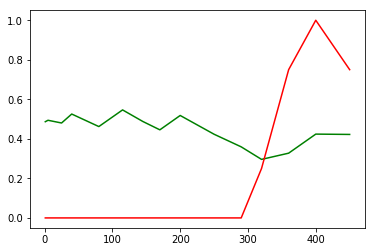

Working on... NVDA
1000.0
Window: 1
[[262 301]
 [265 337]]
F1,score 0.5435483870967742
Accuracy: 0.5141630901287554
11.787686347935873
Window: 5
[[249 305]
 [251 359]]
F1,score 0.5635792778649921
Accuracy: 0.5223367697594502
19.306977288832496
Window: 25
[[  9 498]
 [  8 645]]
F1,score 0.7182628062360803
Accuracy: 0.5637931034482758
1.0
Window: 40
[[  0 500]
 [  0 657]]
F1,score 0.7243660418963617
Accuracy: 0.567847882454624
1.0
Window: 80
[[  0 524]
 [  0 625]]
F1,score 0.7046223224351748
Accuracy: 0.5439512619669278
1.0
Window: 115
[[  0 590]
 [  0 552]]
F1,score 0.6517119244391971
Accuracy: 0.48336252189141854
31.622776601683793
Window: 145
[[374 266]
 [ 39 457]]
F1,score 0.7497949138638228
Accuracy: 0.7315140845070423
31.622776601683793
Window: 170
[[370 245]
 [ 60 456]]
F1,score 0.7493837304847986
Accuracy: 0.7303271441202476
11.787686347935873
Window: 200
[[377 196]
 [ 72 480]]
F1,score 0.781758957654723
Accuracy: 0.7617777777777778
2.6826957952797255
Window: 250
[[479 111]
 [ 44

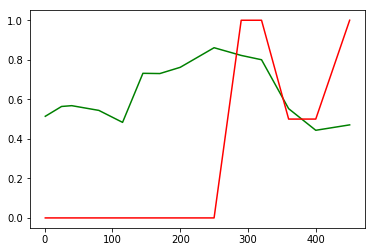

Working on... NFLX
227.58459260747887
Window: 1
[[325 259]
 [332 249]]
F1,score 0.4573002754820936
Accuracy: 0.4927038626609442
1.637893706954064
Window: 5
[[  0 587]
 [  0 577]]
F1,score 0.6628374497415279
Accuracy: 0.4957044673539519
0.0001
Window: 25
[[  0 537]
 [  0 623]]
F1,score 0.6988222097588335
Accuracy: 0.5370689655172414
1.0
Window: 40
[[  0 483]
 [  0 674]]
F1,score 0.736209721463681
Accuracy: 0.5825410544511668
227.58459260747887
Window: 80
[[249 195]
 [394 311]]
F1,score 0.5136251032204789
Accuracy: 0.48738033072236725
1.0
Window: 115
[[220 204]
 [192 526]]
F1,score 0.7265193370165747
Accuracy: 0.6532399299474606
2.6826957952797255
Window: 145
[[  0 405]
 [  0 731]]
F1,score 0.7830744509908945
Accuracy: 0.6434859154929577
1.0
Window: 170
[[  0 404]
 [  0 727]]
F1,score 0.7825618945102261
Accuracy: 0.6427939876215738
610.5402296585327
Window: 200
[[418   8]
 [386 313]]
F1,score 0.6137254901960784
Accuracy: 0.6497777777777778
0.0001
Window: 250
[[  0 425]
 [  0 690]]
F1,sco

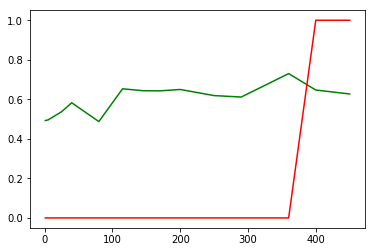

Working on... ADBE
1.0
Window: 1
[[  0 545]
 [  0 619]]
F1,score 0.6943353897924847
Accuracy: 0.531786941580756
1.0
Window: 5
[[  0 537]
 [  0 627]]
F1,score 0.7001675041876048
Accuracy: 0.538659793814433
1.0
Window: 25
[[  0 450]
 [  0 710]]
F1,score 0.7593582887700534
Accuracy: 0.6120689655172413
1.0
Window: 40
[[  0 425]
 [  0 732]]
F1,score 0.7750132345156168
Accuracy: 0.6326707000864304
1.0
Window: 80
[[  0 399]
 [  0 750]]
F1,score 0.7898894154818327
Accuracy: 0.6527415143603134
51.7947467923121
Window: 115
[[  0 407]
 [  0 735]]
F1,score 0.7831646244006394
Accuracy: 0.6436077057793345
1.0
Window: 145
[[  0 410]
 [  0 726]]
F1,score 0.7798066595059077
Accuracy: 0.6390845070422535
1.637893706954064
Window: 170
[[  0 442]
 [  0 689]]
F1,score 0.7571428571428571
Accuracy: 0.6091954022988506
1.0
Window: 200
[[  0 454]
 [  0 671]]
F1,score 0.7472160356347439
Accuracy: 0.5964444444444444
1.0
Window: 250
[[  0 402]
 [  0 713]]
F1,score 0.7800875273522976
Accuracy: 0.6394618834080718
1.0

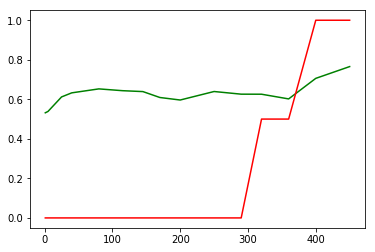

Working on... AMGN
610.5402296585327
Window: 1
[[ 78 502]
 [ 68 516]]
F1,score 0.6441947565543071
Accuracy: 0.5103092783505154
1.0
Window: 5
[[  0 586]
 [  0 577]]
F1,score 0.6632183908045978
Accuracy: 0.4961306964746346
2.6826957952797255
Window: 25
[[  9 510]
 [  8 632]]
F1,score 0.7093153759820426
Accuracy: 0.5530629853321829
1.637893706954064
Window: 40
[[  1 478]
 [  0 677]]
F1,score 0.7390829694323146
Accuracy: 0.5865051903114187
1.637893706954064
Window: 80
[[ 25 453]
 [  0 670]]
F1,score 0.747350808700502
Accuracy: 0.6054006968641115
1.0
Window: 115
[[ 35 377]
 [  0 729]]
F1,score 0.794550408719346
Accuracy: 0.6695880806310254
1.637893706954064
Window: 145
[[ 81 397]
 [  0 657]]
F1,score 0.7679719462302746
Accuracy: 0.6502202643171806
31.622776601683793
Window: 170
[[ 84 382]
 [  0 664]]
F1,score 0.7766081871345029
Accuracy: 0.6619469026548672
1.0
Window: 200
[[106 336]
 [  0 682]]
F1,score 0.8023529411764706
Accuracy: 0.701067615658363
1.0
Window: 250
[[149 351]
 [  0 614]]
F1

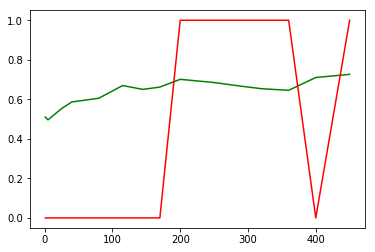

Working on... TXN
138.94954943731375
Window: 1
[[  7 567]
 [ 10 580]]
F1,score 0.6678180771445021
Accuracy: 0.5042955326460481
1.0
Window: 5
[[  0 525]
 [  0 639]]
F1,score 0.7088186356073212
Accuracy: 0.5489690721649485
138.94954943731375
Window: 25
[[ 17 462]
 [ 19 662]]
F1,score 0.7335180055401662
Accuracy: 0.5853448275862069
51.7947467923121
Window: 40
[[100 369]
 [112 576]]
F1,score 0.7054500918554807
Accuracy: 0.5842696629213483
21.54434690031882
Window: 80
[[ 36 410]
 [ 69 634]]
F1,score 0.7258156840297654
Accuracy: 0.5831157528285466
31.622776601683793
Window: 115
[[115 289]
 [139 599]]
F1,score 0.7367773677736777
Accuracy: 0.6252189141856392
31.622776601683793
Window: 145
[[ 98 327]
 [105 606]]
F1,score 0.7372262773722628
Accuracy: 0.6197183098591549
21.54434690031882
Window: 170
[[114 329]
 [ 96 592]]
F1,score 0.73586078309509
Accuracy: 0.6242263483642794
11.787686347935873
Window: 200
[[138 315]
 [106 566]]
F1,score 0.728911783644559
Accuracy: 0.6257777777777778
11.787686347

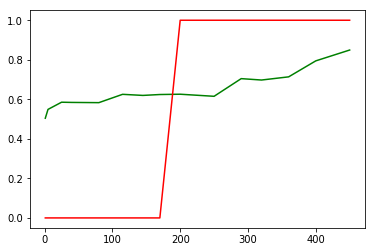

Working on... AVGO
10000.0
Window: 1
[[ 63 519]
 [ 56 526]]
F1,score 0.6465888137676705
Accuracy: 0.5060137457044673
1.0
Window: 5
[[  0 568]
 [  0 596]]
F1,score 0.6772727272727272
Accuracy: 0.5120274914089347
84.83428982440716
Window: 25
[[ 46 543]
 [ 14 557]]
F1,score 0.6666666666666665
Accuracy: 0.5198275862068965
1.0
Window: 40
[[  5 534]
 [  0 618]]
F1,score 0.6983050847457627
Accuracy: 0.5384615384615384
2.782559402207126
Window: 80
[[  4 572]
 [  0 573]]
F1,score 0.6670547147846333
Accuracy: 0.5021758050478677
1.0
Window: 115
[[  0 588]
 [  0 554]]
F1,score 0.6533018867924528
Accuracy: 0.4851138353765324
0.3593813663804626
Window: 145
[[  0 606]
 [  0 530]]
F1,score 0.6362545018007202
Accuracy: 0.4665492957746479
0.3593813663804626
Window: 170
[[ 24 557]
 [  0 550]]
F1,score 0.663850331925166
Accuracy: 0.5075154730327144
166.81005372000558
Window: 200
[[109 473]
 [  1 542]]
F1,score 0.6957637997432606
Accuracy: 0.5786666666666667
1.637893706954064
Window: 250
[[118 453]
 [ 10 5

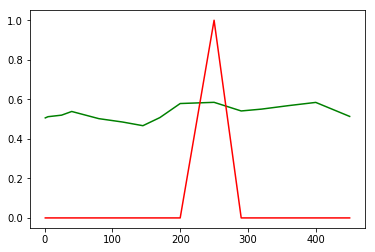

Working on... PYPL
138.94954943731375
Window: 1
[[  0 548]
 [  0 617]]
F1,score 0.6924803591470259
Accuracy: 0.5296137339055794
51.7947467923121
Window: 5
[[  0 556]
 [  0 608]]
F1,score 0.6862302483069979
Accuracy: 0.5223367697594502
1.0
Window: 25
[[  0 518]
 [  0 642]]
F1,score 0.7125416204217536
Accuracy: 0.553448275862069
1.0
Window: 40
[[  0 506]
 [  0 651]]
F1,score 0.7201327433628318
Accuracy: 0.5626620570440796
11.787686347935873
Window: 80
[[ 23 555]
 [ 14 557]]
F1,score 0.6619132501485442
Accuracy: 0.504786771105309
11.787686347935873
Window: 115
[[167 315]
 [ 57 603]]
F1,score 0.7642585551330799
Accuracy: 0.6742556917688266
7.196856730011519
Window: 145
[[161 264]
 [ 54 657]]
F1,score 0.8051470588235294
Accuracy: 0.7200704225352113
7.196856730011519
Window: 170
[[231 219]
 [ 12 669]]
F1,score 0.8527724665391969
Accuracy: 0.7957559681697612
4.39397056076079
Window: 200
[[115 347]
 [  9 654]]
F1,score 0.7860576923076924
Accuracy: 0.6835555555555556
0.0001
Window: 250
[[  0 50

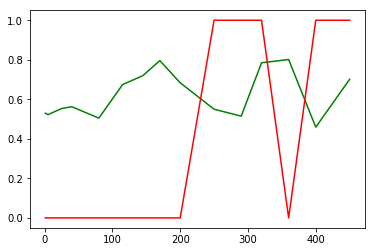

Working on... GILD
21.54434690031882
Window: 1
[[  0 590]
 [  0 574]]
F1,score 0.6605293440736479
Accuracy: 0.49312714776632305
2.6826957952797255
Window: 5
[[  0 593]
 [  0 571]]
F1,score 0.6582132564841499
Accuracy: 0.49054982817869414
31.622776601683793
Window: 25
[[  0 602]
 [  0 558]]
F1,score 0.649592549476135
Accuracy: 0.4810344827586207
1.0
Window: 40
[[  0 581]
 [  0 576]]
F1,score 0.6647432198499712
Accuracy: 0.4978392394122731
138.94954943731375
Window: 80
[[  0 569]
 [  0 580]]
F1,score 0.6709080393290919
Accuracy: 0.504786771105309
7.196856730011519
Window: 115
[[  0 622]
 [  0 520]]
F1,score 0.6257521058965102
Accuracy: 0.4553415061295972
2.782559402207126
Window: 145
[[ 16 622]
 [  0 498]]
F1,score 0.6155747836835599
Accuracy: 0.4524647887323944
10000.0
Window: 170
[[157 516]
 [ 19 439]]
F1,score 0.6213729653220099
Accuracy: 0.5269672855879752
227.58459260747887
Window: 200
[[ 86 586]
 [  0 453]]
F1,score 0.6072386058981233
Accuracy: 0.4791111111111111
0.3593813663804626

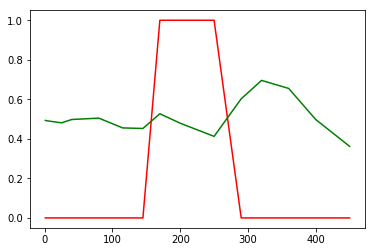

Working on... COST
10000.0
Window: 1
[[344 233]
 [380 208]]
F1,score 0.4042759961127308
Accuracy: 0.4738197424892704
51.7947467923121
Window: 5
[[367 192]
 [431 174]]
F1,score 0.35839340885684856
Accuracy: 0.4647766323024055
84.83428982440716
Window: 25
[[370 136]
 [480 174]]
F1,score 0.3609958506224067
Accuracy: 0.4689655172413793
10000.0
Window: 40
[[376 127]
 [460 194]]
F1,score 0.3979487179487179
Accuracy: 0.49265341400172863
1291.5496650148827
Window: 80
[[369 113]
 [410 257]]
F1,score 0.49566055930568953
Accuracy: 0.5448215839860748
10000.0
Window: 115
[[372  76]
 [414 280]]
F1,score 0.5333333333333333
Accuracy: 0.5709281961471103
0.0001
Window: 145
[[  0 385]
 [  0 751]]
F1,score 0.7959724430312666
Accuracy: 0.6610915492957746
0.0001
Window: 170
[[  0 376]
 [  0 755]]
F1,score 0.8006362672322376
Accuracy: 0.667550839964633
31.622776601683793
Window: 200
[[312  23]
 [587 203]]
F1,score 0.3996062992125984
Accuracy: 0.4577777777777778
0.0001
Window: 250
[[  0 293]
 [  0 822]]
F1,sc

/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.3593813663804626
Window: 320
[[285   0]
 [816   0]]
F1,score 0.0
Accuracy: 0.25885558583106266
1.637893706954064
Window: 360
[[248   0]
 [752  93]]
F1,score 0.19829424307036247
Accuracy: 0.3119853613906679
0.0001
Window: 400
[[  0 220]
 [  0 865]]
F1,score 0.8871794871794871
Accuracy: 0.7972350230414746
0.3593813663804626
Window: 450
[[201  43]
 [629 202]]
F1,score 0.3754646840148698
Accuracy: 0.37488372093023253
[0, 0, 0, 0, 0, 0, 0, 0, 0, 25, 25, 25, 25, 50, 50]
[0.4738197424892704, 0.4647766323024055, 0.4689655172413793, 0.49265341400172863, 0.5448215839860748, 0.5709281961471103, 0.6610915492957746, 0.667550839964633, 0.4577777777777778, 0.737219730941704, 0.27371273712737126, 0.25885558583106266, 0.3119853613906679, 0.7972350230414746, 0.37488372093023253]
accuracy
accuracy


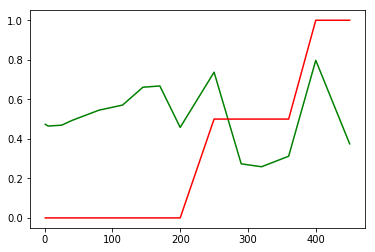

Working on... QCOM
1000.0
Window: 1
[[ 23 551]
 [ 21 570]]
F1,score 0.6658878504672897
Accuracy: 0.5090128755364807
1.0
Window: 5
[[  0 541]
 [  0 623]]
F1,score 0.6972579742585339
Accuracy: 0.5352233676975945
1.0
Window: 25
[[  0 490]
 [  0 670]]
F1,score 0.73224043715847
Accuracy: 0.5775862068965517
7.196856730011519
Window: 40
[[ 10 490]
 [ 66 591]]
F1,score 0.6800920598388953
Accuracy: 0.5194468452895419
7.196856730011519
Window: 80
[[ 52 372]
 [207 518]]
F1,score 0.6414860681114551
Accuracy: 0.4960835509138381
0.3593813663804626
Window: 115
[[  0 409]
 [  0 733]]
F1,score 0.7818666666666666
Accuracy: 0.6418563922942206
1.637893706954064
Window: 145
[[ 63 366]
 [132 575]]
F1,score 0.6978155339805825
Accuracy: 0.5616197183098591
1.637893706954064
Window: 170
[[269 205]
 [309 348]]
F1,score 0.5752066115702479
Accuracy: 0.5455349248452697
4.39397056076079
Window: 200
[[347 169]
 [299 310]]
F1,score 0.5698529411764707
Accuracy: 0.584
1.637893706954064
Window: 250
[[ 90 471]
 [  0 554]]

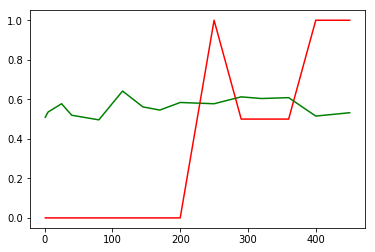

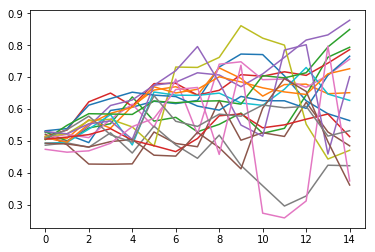

In [92]:
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
inbalancinglist=[]
for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    inbalance=[]
   
    print('Working on...',files[o])
    o+=1
    xtemp=price
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    xtemp=normalize(xtemp,axis=0,norm='max')
    #print(xtemp)
    accintime=[]
     
    trendwindowtime=[1,5,25,40,80,115,145,170,200,250,290,320,360,400,450]
    f1total=[]
    acctotal=[]
    auctotal=[]
    f1scoretotal=[]
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        

        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            
            if(s==-1):
                y.append(0)
            else:
                y.append(1)
            x.append(xtemp[i])
        y=np.array(y)
       
        x=np.array(x)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
    

        cspace=np.concatenate(((np.logspace(0,3,15)),np.logspace(-4,4,10)))
        gspace=[1]
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(C=c)
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    #prediction=rbf_svm.predict(x_val)
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                    cvacclist.append(rbf_svm.score(x_val,y_val))
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    
                    maxc=c
                    bestsvm=rbf_svm
        inbalance.append(totu)
        #print('ACCURACY on val:',maxacc)
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        print(maxc)
        rbf_svm=svm.SVC(C=maxc)
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        confmatrix=confusion_matrix(y_test, prediction)
        print('Window:',t)
        print(confmatrix)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=rbf_svm.score(x_test,y_test)
        #print('Accuracy on TEST set:',testacc
        
        print('F1,score',CM)
        print('Accuracy:',valueacc)
        f1scoretotal.append(CM)
        f1total.append(totu)
        acctotal.append(valueacc)
        auctotal.append(auc)
    print(f1total)
    print(acctotal)
    print('accuracy')
    print('accuracy')
    f1total=normalize(np.asarray(f1total).reshape(-1,1),axis=0,norm='max')
    plt.plot(trendwindowtime,acctotal,'g')
    plt.plot(trendwindowtime,f1total,'r')
    plt.show()
    inbalancinglist.append(inbalance)
    f1scoreresults.append(f1scoretotal)
    accstocksresults.append(acctotal)
    f1stocksresults.append(f1total)
    aucresults.append(auctotal)
for p in accstocksresults:
    plt.plot(p)
plt.show()

In [104]:
tempacc=f1scoreresults
tempbalance=inbalancinglist

[0.59454822 0.58168092 0.59905231 0.66292535 0.63789881 0.70649107
 0.71536969 0.70632288 0.67605635 0.72878298 0.66374728 0.66672001
 0.62455964 0.67246932 0.6300048 ]
[ 0.          0.          0.          0.          0.          0.
  0.          1.38888889  5.55555556 15.27777778 15.27777778 19.44444444
 22.22222222 30.55555556 31.94444444]


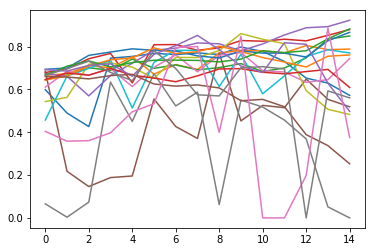

In [105]:
import operator
t=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
b=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(0,len(tempacc)):
    b=np.add(b,tempbalance[i])
    t=np.add(t,tempacc[i])
    plt.plot(tempacc[i])
print(t/len(tempacc))
print(b/len(tempbalance))
plt.show()

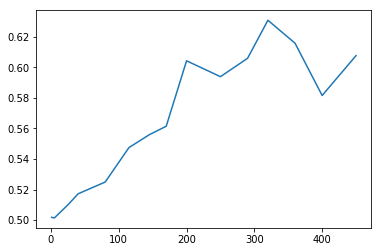

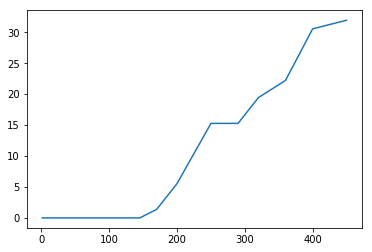

In [101]:
plt.plot(trendwindowtime,t/len(tempacc))
#normalized=normalize((b/len(tempbalance)).reshape(1, -1),axis=0,norm='max')

plt.show()
plt.plot(trendwindowtime,b/len(tempbalance))
plt.show()